Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.45      0.53   1565214
           1       0.58      0.77      0.66   1557646

    accuracy                           0.61   3122860
   macro avg       0.62      0.61      0.60   3122860
weighted avg       0.62      0.61      0.60   3122860



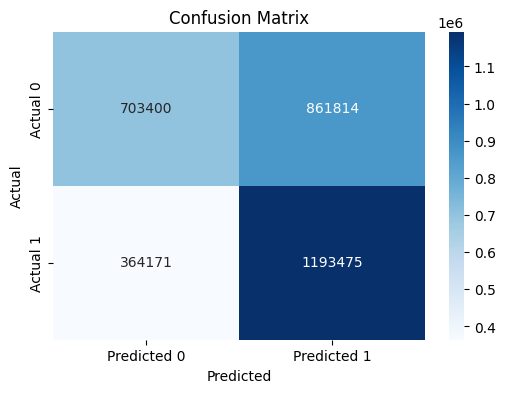

Accuracy: 0.6074159584483454
Precision: 0.5806847601480862
Recall: 0.766204259504406
F1 Score: 0.6606678503764946
Predicted value for the custom sample: [1]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Load data
merged_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Merged_UniSolar_Data_Interpolated.csv')

# Data preprocessing
merged_data = merged_data.drop(columns=['ApparentTemperature', 'AverageSolarGeneration', 'MinSolarGeneration'])

X = merged_data.drop(columns=['MaxSolarGeneration'])
y = merged_data['MaxSolarGeneration']

X = pd.get_dummies(X, columns=['Month', 'DataStatus'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Binning target variable
n_bins = 2
y_binned = pd.qcut(y, q=n_bins, labels=False, duplicates='drop').fillna(pd.qcut(y, q=n_bins, labels=False, duplicates='drop').mode()[0])

# Re-apply the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Drop missing values in X_train and X_test
X_train, y_train = X_train.dropna(), y_train[X_train.index]
X_test, y_test = X_test.dropna(), y_test[X_test.index]

# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_test)

# Classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluation metrics
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1]) if (conf_matrix[1, 1] + conf_matrix[0, 1]) != 0 else 0
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0]) if (conf_matrix[1, 1] + conf_matrix[1, 0]) != 0 else 0
f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

# Custom sample prediction
custom_sample = pd.DataFrame({
    'AirTemperature': [15.0],
    'DewPointTemperature': [10.0],
    'RelativeHumidity': [80.0],
    'WindSpeed': [5.0],
    'WindDirection': [180.0],
    'Year': [2020],
    'Month': ['January'],
    'SiteKey': [1],
})

custom_sample = pd.get_dummies(custom_sample, drop_first=True)
custom_sample = custom_sample.reindex(columns=X_train.columns, fill_value=0)

predicted_value = nb_model.predict(custom_sample)
print("Predicted value for the custom sample:", predicted_value)


In [ ]:
# Print the size of each bin
print("Size of each bin:")
print(y_binned.value_counts())

Size of each bin:
MaxSolarGeneration
0    7828060
1    7786238
Name: count, dtype: int64
